# Simple Linear Regression with Python 

## Setting Up the Working Environment
Import the necessary packages for this project with their aliases.

  1. Import pandas
  2. Import numpy
  3. Import matplotlib
  4. Import seaborn
  
use this to render the plots in jupyter
```python
%matplotlib inline
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Boston Housing Dataset  

  - Housing Dataset is the in the datasets module from sklearn
     1. Import datasets from sklearn
     2. load the boston housing dataset
     
Syntax:

```python
# import datasets
from sklearn import datasets
# load boston housing dataset and call it boston
boston = datasets.load_boston()
```

In [2]:
# Load the boston dataset 
from sklearn import datasets

In [3]:
# from sklearn.datasets import load_boston

In [4]:
# load boston dataset 
boston = datasets.load_boston()

#### Note:

We can do the previous two steps in just one step like this
```python
from sklearn.datasets import load_boston
```
I am doing it in two steps for the purpose of teaching.

### Check the dataset

Syntax:
```python
# Use dir() function
dir(boston)
# Or get the keys using the keys() method
print(boston.keys())
```

In [5]:
# The type of sklearn objects
type(boston)

sklearn.utils.Bunch

In [6]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### Dataset Description

Before starting analysing the data, you need to get to know it first, know the variable names and what they. If you don't know what you have, how can you use it?

Syntax:
```python
boston.DESCR
# Use print() function to get a nice display
print(boston.DESCR)
```

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Get the feature names

  - Features or attributes are the independent (explanatory) variables.
  
Syntax:
```python
boston.feature_names
```

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Get the Data, and check the shape

  - Data is the data points of features
  
Syntax: 
```python
# Checking the data
boston.data
# Check the first few observations
boston.data[:5, : ]
# Checking the shape
boston.data.shape
```

In [9]:
boston.data[:5, : ]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [10]:
boston.data.shape

(506, 13)

### Check the Target Variable, and The shape
  - The **target** is the dependent, outcome, response variable.
  
Syntax:
```python
# target 
boston.target
# Check the first 10 observations
boston.target[:10]
# Check the last 10 observations
boston.target[-10:]
# shape
boston.target.shape
```

In [11]:
# The first ten obs
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [12]:
# The last ten obs
boston.target[-10:]

array([19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. , 11.9])

In [13]:
# the response variable shape
boston.target.shape

(506,)

### Check the Type of the Target and the Data

Syntax:
```python
# The Target
print(type(boston.target))
# The Data
print(type(boston.data))
```

In [14]:
# the type to target variable
print(type(boston.target))

<class 'numpy.ndarray'>


In [15]:
# the type of data
print(type(boston.data))

<class 'numpy.ndarray'>


### Renaming The Data and the Target Variable: 
 
 - In accordance with the common scikit-learn practice, we rename the target (response) variable as __y__ (lowercase), and __X__ (Uppercase) for the features data.  
  
 - After renaming the features data, you need to convert the array of data into a DataFrame object.
 
Syntax:

```python
# Features data
X = boston.data

# Converting X into a DataFrame
bost_df = pd.DataFrame(X, columns = boston.feature_names)
# target variable data
y = boston.target
```

In [16]:
X = boston.data
bost_df = pd.DataFrame(X, columns = boston.feature_names)
bost_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
# rename the target y
y = boston.target

In [18]:
# first obs
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Prepare the data for estimation

  1. We have to build a DataFrame that has the target and all the features to use it for estimation.

We already converted the features data into DataFrame, we can create add the target variable and we name it as 'Price'

Syntax:
```python
bost_df['Price'] = boston.target
```

In [19]:
# add the target variable to the DataFrame 
bost_df['Price'] = y
bost_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


___
We are ready to start our analysis.

## Exploratory Data Analysis

- EDA is a crucial step in any machine learning project.

### Check the Info about the Dataset

Syntax:
```python
bost_df.info()
```

In [21]:
bost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Print few Observations (first and last)

Syntax:
```python 
# First obs
bost_df.head()
# Last obs
bost_df.tail()
```

In [22]:
bost_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
bost_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### Data Summary Statistics

- Run summary statistics for the data

Syntax:
```python
bost_df.describe()
```

In [24]:
# run the summary statistics then tranpose it to have a better look
bost_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Visualization of the target variable

Syntax:
```python
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')
```

In [25]:
# Setting the figure size 
sns.set(rc={'figure.figsize':(12,8)})

Text(0, 0.5, 'Number of houses')

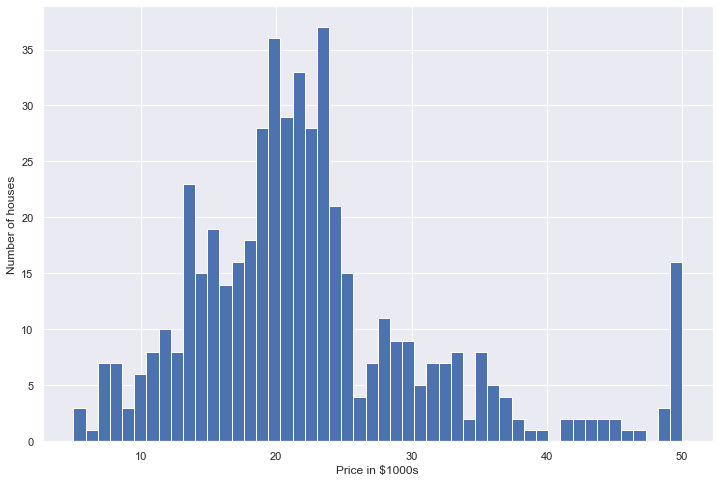

In [26]:
# Plot the histogram
plt.hist(boston.target, bins=50)

# label the axes 
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

### Feature Selection

  - We will run the correlation to check what variables are highly correlated with the target variable. Then we plot the correlation using heatmap function from seaborn.
  
Syntax:
```python
sns.heatmap(bost_df.corr())
```

<AxesSubplot:>

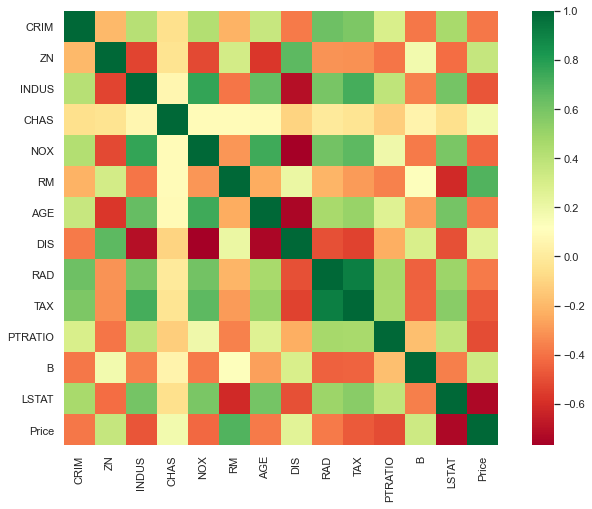

In [28]:
# Plotting the heatmap
sns.heatmap(bost_df.corr(), square=True, cmap='RdYlGn')

### Plotting highley Correlated Features with the Target

  - We see from the previous plot that the __RM (average number of rooms)__ is positively correlated with price. Therefore, we will plot price against RM.
  
```python 
plt.scatter(x = bost_df['RM'], y = bost_df['Price']) 
```

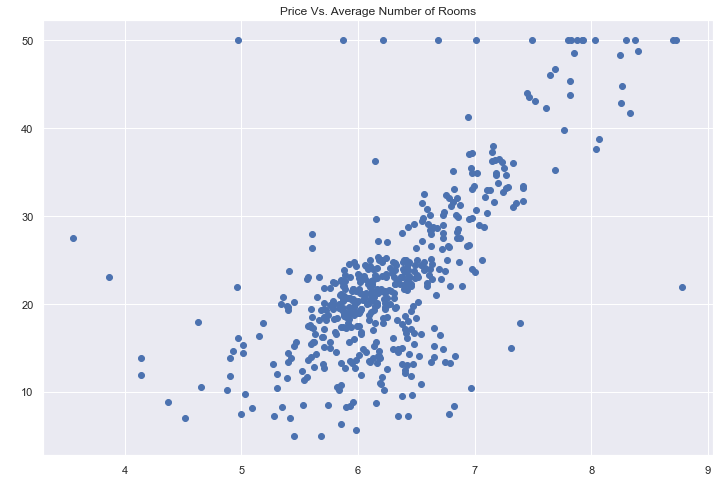

In [29]:
plt.scatter(bost_df['RM'], bost_df['Price'])
plt.xlabel("   ")
plt.ylabel("   ")
plt.title("Price Vs. Average Number of Rooms")
plt.show()

It is better to have a fitted line plotted. We can do that by using __lmplot()__ from seaborn

Syntax:
```python
sns.lmplot(x= 'RM', y = 'Price', data = bost_df)
```

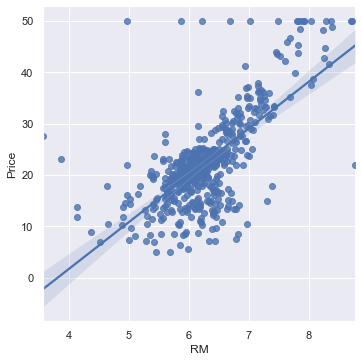

In [30]:
sns.lmplot(x = "RM", y = "Price", data = bost_df)

### Use lmplot to plot LSTAT 
```python
sns.lmplot(x= 'LSTAT', y = 'Price', data = bost_df)
```

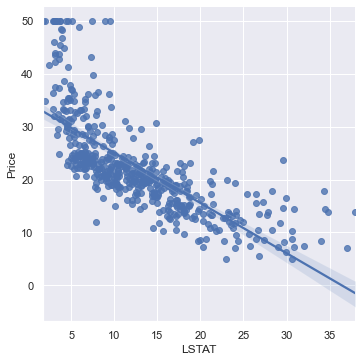

In [31]:
sns.lmplot(x= 'LSTAT', y = 'Price', data = bost_df)

## Simple Linear Regression with SK-Learn

First, we run a simple linear regression to get familiar with the technique, then we move forward to advanced modelling. 

- Import linear_model from sklearn

- Run a simple linear regression

  $Price=\beta_{0} + \beta_{1} RM + error$
  
- Read the results

Syntax 01:
```python
# Import linear_model
from sklearn import linear_model

# Instantiate LinearRegression
simple_reg = linear_model.LinearRegression()

# Implement Linear Regression using fit()
simple_reg.fit(target, feature)
```

Syntax 02:
```python
from sklearn.linear_model import LinearRegression
# Create LR object
lm = LinearRegression()
```

In [32]:
# Import linear_model
from sklearn import linear_model

In [33]:
# Create a LinearRegression Object
lm_reg = linear_model.LinearRegression()

In [34]:
type(lm_reg)

sklearn.linear_model._base.LinearRegression

### Instantiation LinearRegression Object

In order to use LinearRegression() function:

  1. Instantiate (create a new object)
  2. Use the object to fit the model
  3. Use the object to predict new data
  4. Use the object to score the prediction; for example, lm.score() returns the coefficient of determination (R^2).
  
Syntax:
```python
# Create New Obj
lm = linearRegression()
# Fit Linear Regression
lm.fit()
# Predict new data
lm.predict()
# Score Prediction
lm.score()
```

### Note: 

Running Linear Regression with Sklearn requires object to be 2D-arrays. Thus, some steps are required, such as converting variables into  2D-arrays. There is a shortcut to do that by using __reshape(-1, 1)__ function

Syntax:
```python
one-D-array.reshape(-1, 1)
# Or use this syntax
np.array(oneD_obj).reshape(-1, 1)
```

In [35]:
X = bost_df['RM']
y = bost_df['Price']

In [36]:
# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

Dimensions of y before reshaping:  (506,)
Dimensions of X before reshaping:  (506,)


In [37]:
# Reshape X and y
y_reshaped = np.array(y).reshape(-1, 1)
X_reshaped = np.array(X).reshape(-1, 1)

In [38]:
# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y after reshaping:  (506, 1)
Dimensions of X after reshaping:  (506, 1)


### Fitting Linear Regression
 
  - Use `fit()` function to fit the model
Syntax:
```python
lm.fit(x, y)
```

In [39]:
# Fit linear model 
lm_reg.fit(X_reshaped, y_reshaped)

LinearRegression()

### Check the lm object

You can use `dir()` function to see the attributes of lm object.

Syntax:
```python 
print([att for att in dir(lm) if '_' and '__' not in att])
```

In [40]:
print([saad for saad in dir(lm_reg) if '_' and '__' not in saad])

['_abc_impl', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_residues', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']


### Check the Coefficients

  1. The intercept can be checked using `lm.intercept_`
  2. The Other coefficients are avalable in `lm.coef_`
  
Syntax:
```python
# Intercept
print('The intercept of simple linear regression is', lm.intercept_)
# Coefficients
print('The intercept of simple linear regression is', lm.coef_)
```

In [41]:
# Intercept
print('The intercept of simple linear regression is', lm_reg.intercept_)

The intercept of simple linear regression is [-34.67062078]


In [42]:
# Coefficients
print('The intercept of simple linear regression is', lm_reg.coef_)

The intercept of simple linear regression is [[9.10210898]]


### Saving the results into a table

In [43]:
coef_df = pd.DataFrame({'Intercept': lm_reg.intercept_,
                        'Coef': lm_reg.coef_.flatten()})
coef_df

,Intercept,Coef
0,-34.670621,9.102109


### The Goodness-of-Fit

1. One of the metrics to check how well our model fits the data is the coefficient of determination of $R^{2}$. Which can be retrieved using `lm.score()` function.

Syntax:
```python
lm.score(X, y)
# Or use print 
print("The R^2 of model is: {:0.3f}".format(lm.score(X_reshaped, y_reshaped)))
```

In [44]:
print("The R^2 of model is: {:0.3f}".format(lm_reg.score(X_reshaped, y_reshaped)))

The R^2 of model is: 0.484


### Prediction

Now we can use the for prediction. However, we don't new data, thus we will predict on the same data used to build the model. We will address this point later in detail. Prediction is done using `lm.predict()` function:

Syntax:
```python
y_pred = lm.predict(new_data)
```

In [45]:
y_pred = lm_reg.predict(X_reshaped)

### Ploting The results

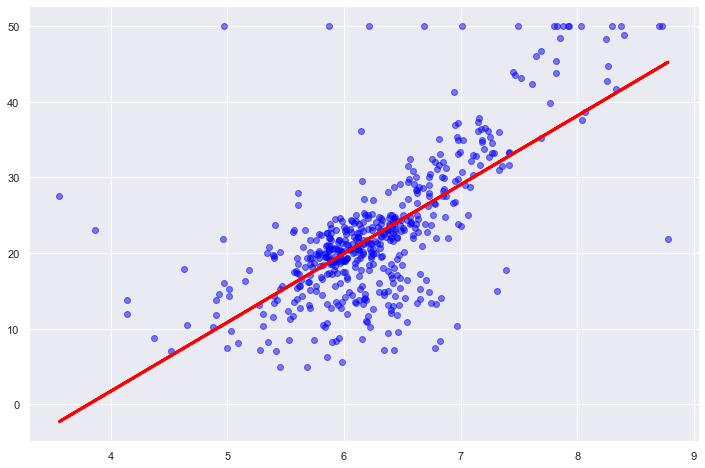

In [46]:
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X_reshaped, y_pred, color='red', linewidth=3)
plt.show()